In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load first dataset
df_hist_data=pd.read_csv('ml_case_training_hist_data.csv')
df_hist_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [3]:
#load second dataset
df_train_data=pd.read_csv('ml_case_training_data.csv')
df_train_data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


## Merging the two Trainning datasets

In [4]:
df_merged=df_hist_data.merge(df_train_data, how='left', on='id')
df_merged.head(10)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,activity_new,campaign_disc_ele,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,wxemiwkumpibllwklfbcooafckufkdlm,NaN,...,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,wxemiwkumpibllwklfbcooafckufkdlm,NaN,...,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,wxemiwkumpibllwklfbcooafckufkdlm,NaN,...,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,wxemiwkumpibllwklfbcooafckufkdlm,NaN,...,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,wxemiwkumpibllwklfbcooafckufkdlm,NaN,...,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.0,0.0,44.266930,0.0,0.0,wxemiwkumpibllwklfbcooafckufkdlm,NaN,...,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.0,0.0,44.444710,0.0,0.0,wxemiwkumpibllwklfbcooafckufkdlm,NaN,...,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.0,0.0,44.444710,0.0,0.0,wxemiwkumpibllwklfbcooafckufkdlm,NaN,...,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.0,0.0,44.444710,0.0,0.0,wxemiwkumpibllwklfbcooafckufkdlm,NaN,...,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.0,0.0,44.444710,0.0,0.0,wxemiwkumpibllwklfbcooafckufkdlm,NaN,...,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2


In [5]:
# drop irrelevent column
df_merged.drop(columns='campaign_disc_ele', inplace=True)

In [6]:
df_merged.shape

(193002, 38)

In [7]:
#check missing values
df_merged.isnull().sum()

id                               0
price_date                       0
price_p1_var                  1359
price_p2_var                  1359
price_p3_var                  1359
price_p1_fix                  1359
price_p2_fix                  1359
price_p3_fix                  1359
activity_new                114432
channel_sales                50595
cons_12m                         0
cons_gas_12m                     0
cons_last_month                  0
date_activ                       0
date_end                        21
date_first_activ            150960
date_modif_prod               1875
date_renewal                   477
forecast_base_bill_ele      150960
forecast_base_bill_year     150960
forecast_bill_12m           150960
forecast_cons               150960
forecast_cons_12m                0
forecast_cons_year               0
forecast_discount_energy      1507
forecast_meter_rent_12m          0
forecast_price_energy_p1      1507
forecast_price_energy_p2      1507
forecast_price_pow_p

## Replacing missing values for numerical data

In [8]:
df_merged['price_p1_var'].fillna(df_merged['price_p1_var'].mean(),inplace=True)
df_merged['price_p2_var'].fillna(df_merged['price_p2_var'].mean(),inplace=True)
df_merged['price_p3_var'].fillna(df_merged['price_p3_var'].mean(),inplace=True)
df_merged['price_p1_fix'].fillna(df_merged['price_p1_fix'].mean(),inplace=True)
df_merged['price_p2_fix'].fillna(df_merged['price_p2_fix'].mean(),inplace=True)
df_merged['price_p3_fix'].fillna(df_merged['price_p3_fix'].mean(),inplace=True)
df_merged['forecast_price_energy_p1'].fillna(df_merged['forecast_price_energy_p1'].mean(),inplace=True)
df_merged['forecast_price_energy_p2'].fillna(df_merged['forecast_price_energy_p2'].mean(),inplace=True)
df_merged['forecast_price_pow_p1'].fillna(df_merged['forecast_price_pow_p1'].mean(),inplace=True)
df_merged['margin_gross_pow_ele'].fillna(df_merged['margin_gross_pow_ele'].mean(),inplace=True)
df_merged['margin_net_pow_ele'].fillna(df_merged['margin_net_pow_ele'].mean(),inplace=True)
df_merged['net_margin'].fillna(df_merged['net_margin'].mean(),inplace=True)
df_merged['pow_max'].fillna(df_merged['pow_max'].mean(),inplace=True)
df_merged['forecast_discount_energy'].fillna(df_merged['forecast_discount_energy'].mean(),inplace=True)






## Replacing missing values for categorical data

In [9]:
df_merged['channel_sales'].fillna(df_merged['channel_sales'].mode(),inplace=True)
df_merged['date_modif_prod'].fillna(df_merged['date_modif_prod'].mode(),inplace=True)
df_merged['date_renewal'].fillna(df_merged['date_renewal'].mode(),inplace=True)
df_merged['origin_up'].fillna(df_merged['origin_up'].mode(),inplace=True)




In [10]:
#Dropping missing values for those more than 30% missing values
df_merged=df_merged.dropna(how="any")

In [11]:

df_merged['activity_new'].value_counts().nunique()

27

In [12]:
df_merged.to_csv('merged.csv')

## DATA EXPLORATION

In [13]:
sns.set(style="darkgrid")


## Distribution in Gas and Non Gas Clients

Text(0.5, 1.0, 'Distribution in Gas and Non Gas Clients')

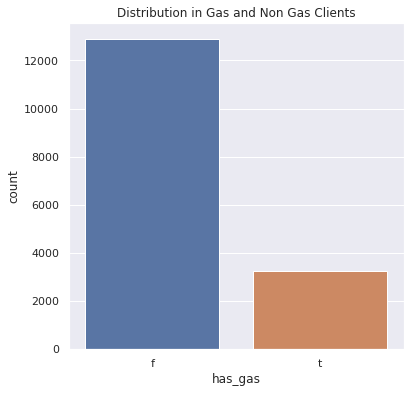

In [14]:

plt.figure(figsize=(6,6))
sns.countplot(x='has_gas',data=df_merged)
plt.title('Distribution in Gas and Non Gas Clients')


# majority of electricity clients are not gas clients too


In [15]:
## confirming data types
df_merged["date_activ"]=pd.to_datetime(df_merged["date_activ"]) #convert to datetime


dtype=df_merged['date_activ'].dtypes
print(dtype)

datetime64[ns]


## Contract Activation Dates Grouped Yearly

Text(0.5, 1.0, 'Contract Activation Dates Grouped Yearly')

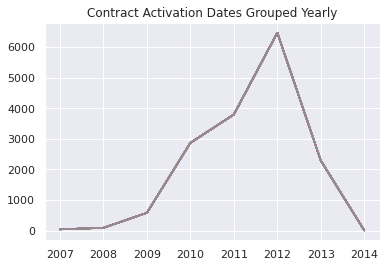

In [16]:
df_merged['year'] = pd.DatetimeIndex(df_merged['date_activ']).year
years=[year for year, df in df_merged.groupby("year")]
plt.plot(years, df_merged.groupby(["year"]).count())
plt.title('Contract Activation Dates Grouped Yearly')

#2012 had the highest number of contracts for activation
#from 2012 the numbers droped almost drastically

## Distribution in Past 12 Months Electricty Consumption Monthly

Text(0.5, 1.0, 'Electricty Consumption Monthly')

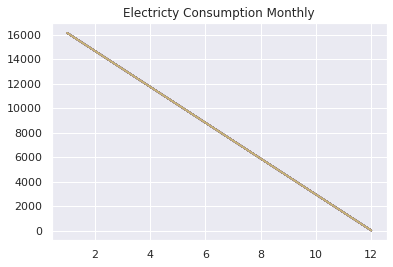

In [17]:
df_merged['month_p'] = pd.DatetimeIndex(df_merged['cons_12m']).month
months_p=[month_p for month_p, df in df_merged.groupby("month_p")]
plt.plot(months_p, df_merged.groupby(["month_p"]).count())
plt.title('Electricty Consumption Monthly')

# Electricity Consumption has been decreasing from first month to the last month

## Distribution In Channel Sales

Text(0.5, 1.0, 'Distribution In Channel Sales')

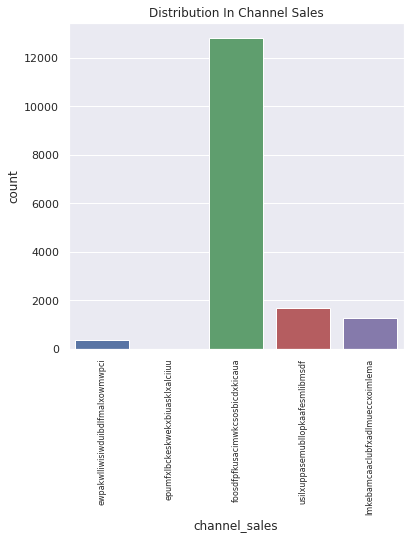

In [18]:
plt.figure(figsize=(6,6))

sns.countplot(x='channel_sales',data=df_merged)
plt.xticks(rotation="vertical",size=8)
plt.title('Distribution In Channel Sales')

# the third channes has the most sales


## Gas & Electricity Consumption In 12 Months

Text(0.5, 1.0, 'Gas & Electricity Consumption In 12 Months')

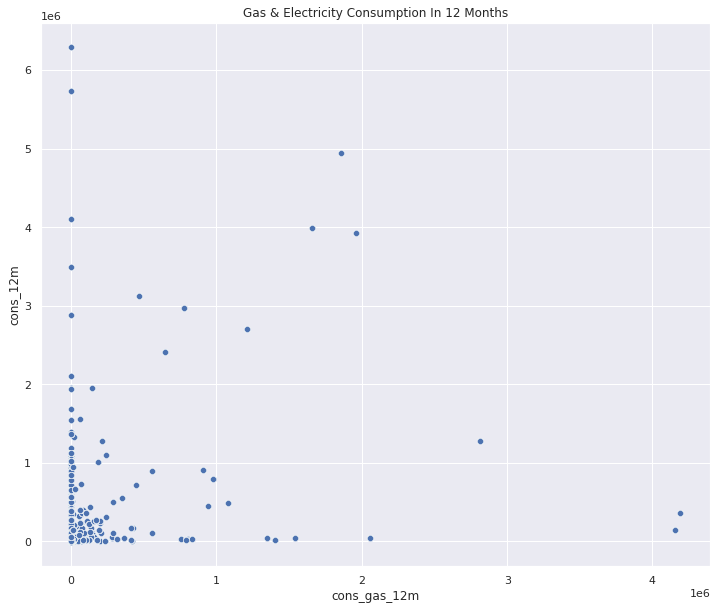

In [19]:
plt.figure(figsize=(12,10))
axis=sns.scatterplot(x="cons_gas_12m",y="cons_12m",data=df_merged)
plt.title("Gas & Electricity Consumption In 12 Months")


# Most of gas and Electricity consumption for the last 12 months ranges below 1000000

## Distribution in First Period Prices

/home/leapfrog/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

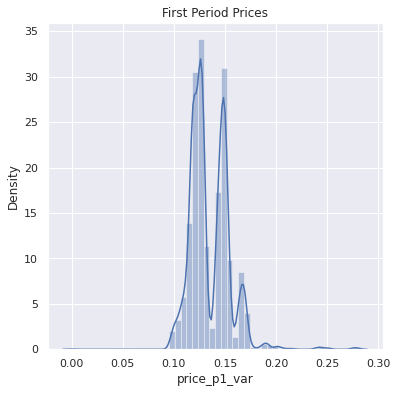

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(df_merged['price_p1_var'])
plt.title('First Period Prices')
plt.show

## Distribution in Second Period Prices

/home/leapfrog/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

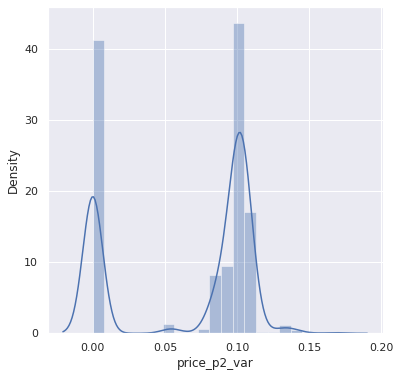

In [21]:
plt.figure(figsize=(6,6))
sns.distplot(df_merged['price_p2_var'])
plt.show

## Distribution in First Period Prices

/home/leapfrog/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

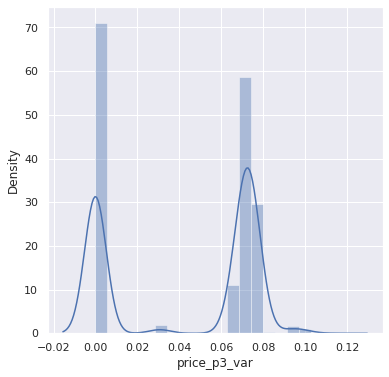

In [22]:
plt.figure(figsize=(6,6))
sns.distplot(df_merged['price_p3_var'])
plt.show

## Distribution in Forecasted Price energy for period 1

/home/leapfrog/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


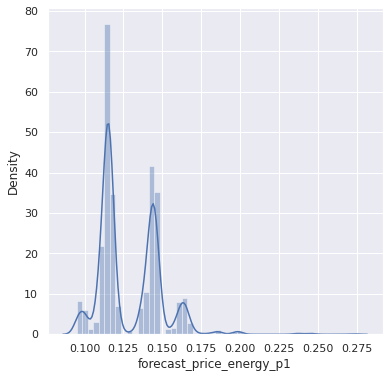

In [23]:
plt.figure(figsize=(6,6))
sns.distplot(df_merged['forecast_price_energy_p1'])
plt.show()

## Distribution in Current Paid Consumption

/home/leapfrog/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

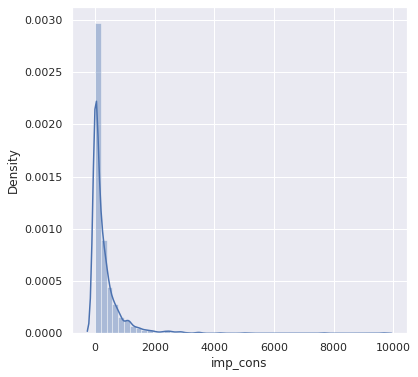

In [24]:
plt.figure(figsize=(6,6))
sns.distplot(df_merged['imp_cons'])
plt.show

## Distribution in Subscribed Power

/home/leapfrog/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

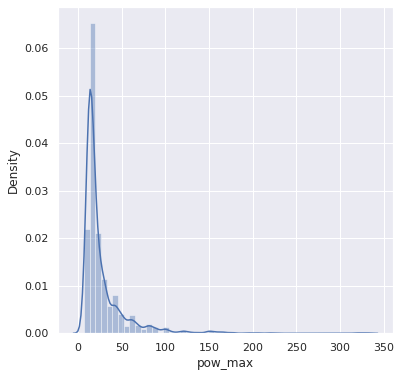

In [25]:
plt.figure(figsize=(6,6))
sns.distplot(df_merged['pow_max'])
plt.show

## Distribution in Antiquity of Clients(Years)

/home/leapfrog/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

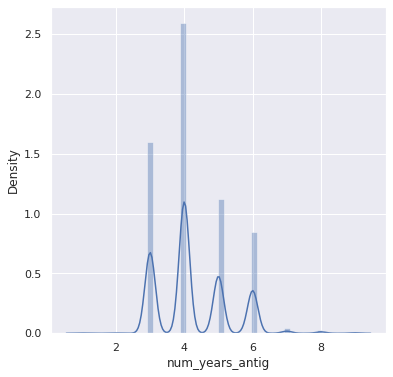

In [26]:
plt.figure(figsize=(6,6))
sns.distplot(df_merged['num_years_antig'])
plt.show

In [27]:
forecast = df_merged[["id","forecast_base_bill_ele","forecast_base_bill_year",
 "forecast_bill_12m","forecast_cons","forecast_cons_12m",
 "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
 "forecast_price_energy_p1","forecast_price_energy_p2",
 "forecast_price_pow_p1"]]


NameError: name 'plot_distribution' is not defined

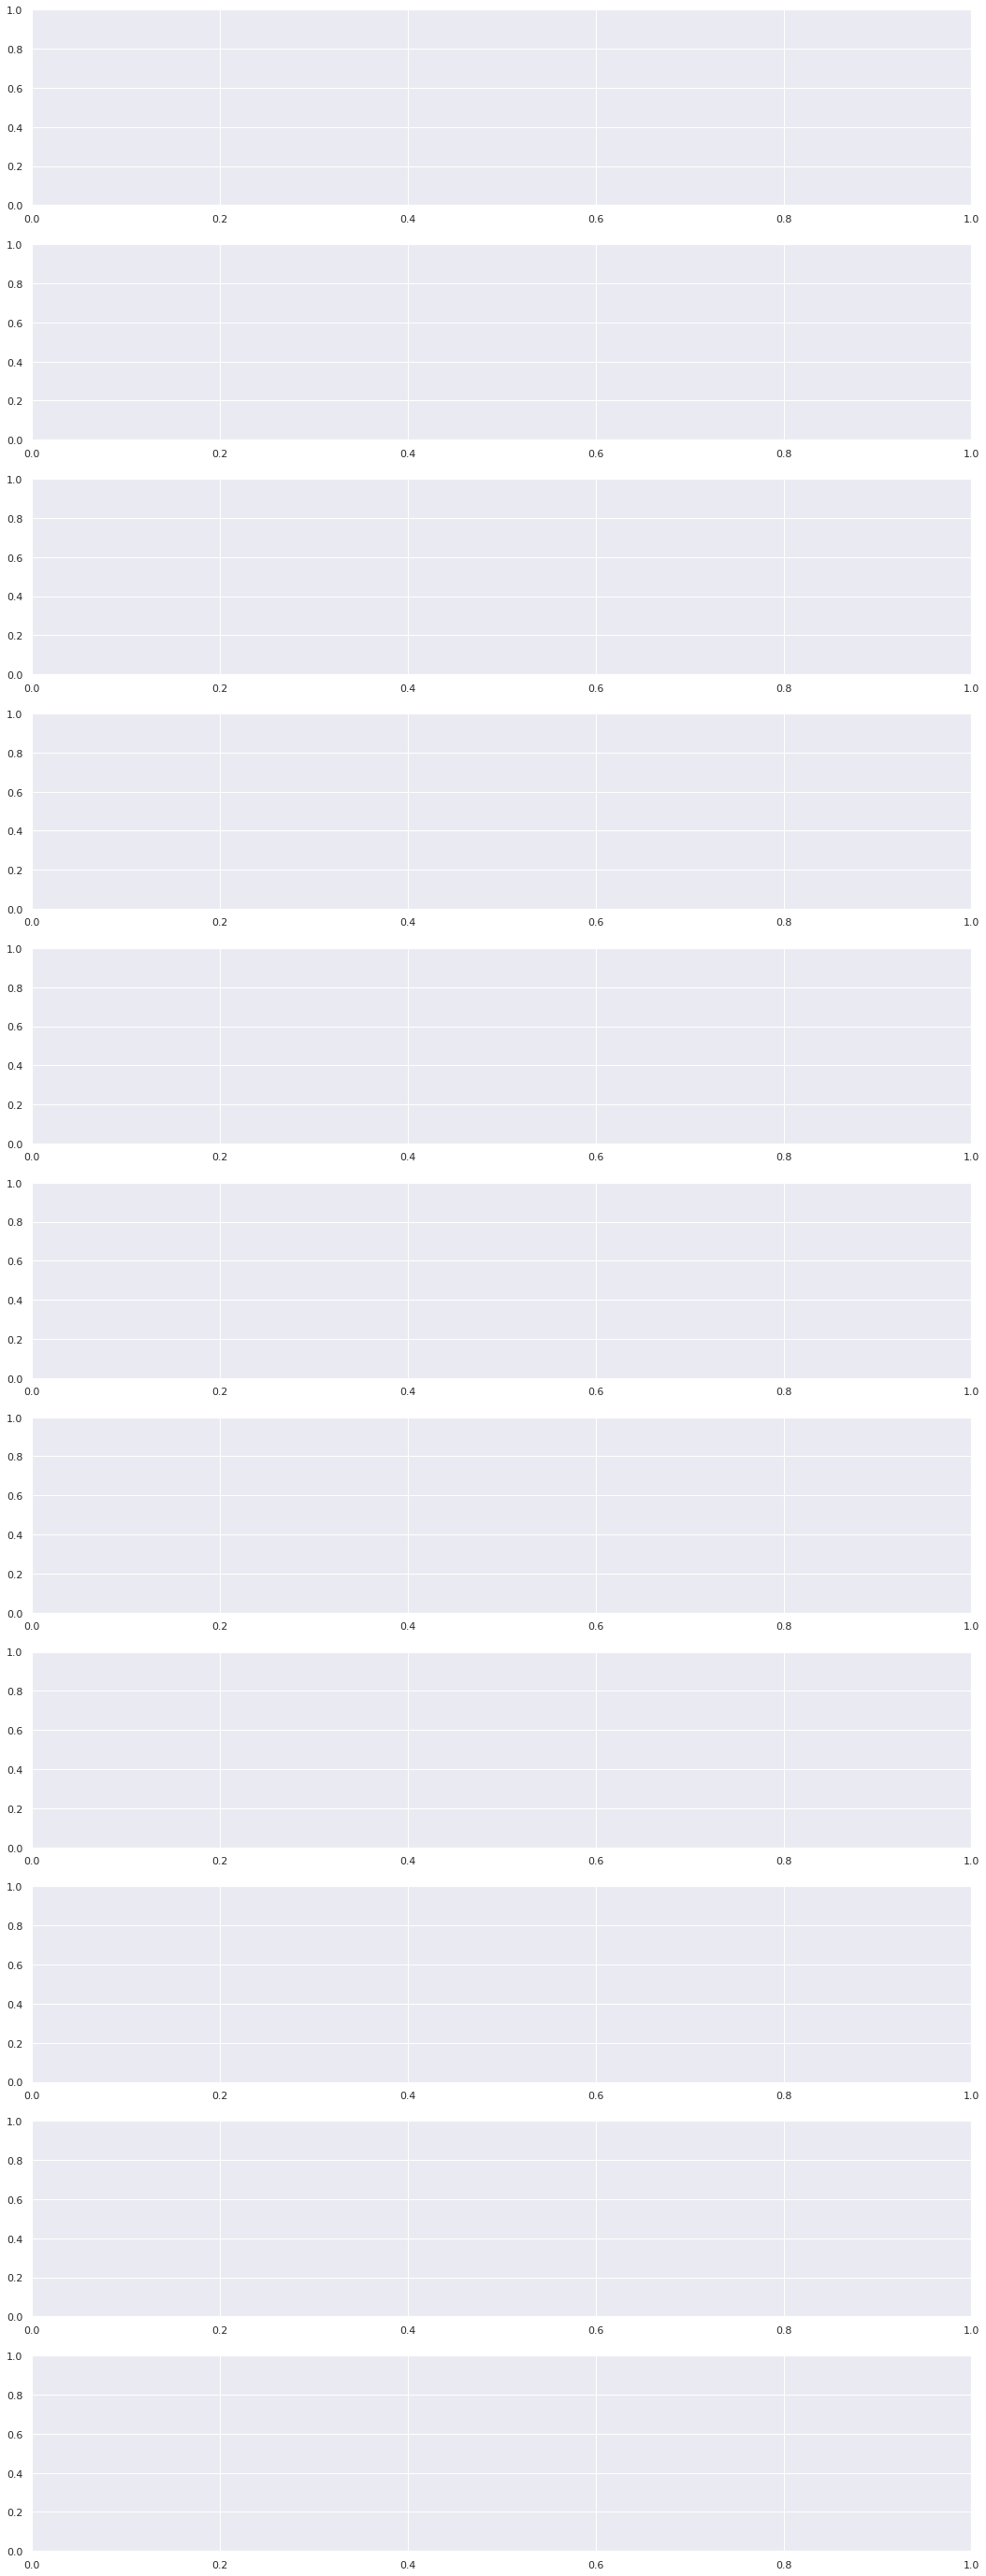

In [28]:
fig, axs = plt.subplots(nrows=11, figsize=(18,50))
# Plot histogram
plot_distribution==sns.distplot
plot_distribution(df_merged, "forecast_base_bill_ele",axs[0])
plot_distribution(df_merged, "forecast_base_bill_year", axs[1])
plot_distribution(df_merged, "forecast_bill_12m", axs[2])
plot_distribution(df_merged, "forecast_cons", axs[3])
plot_distribution(df_merged, "forecast_cons_12m", axs[4])
plot_distribution(df_merged, "forecast_cons_year", axs[5])
plot_distribution(df_merged, "forecast_discount_energy", axs[6])
plot_distribution(df_merged, "forecast_meter_rent_12m", axs[7])
plot_distribution(df_merged, "forecast_price_energy_p1", axs[8])
plot_distribution(df_merged, "forecast_price_energy_p2", axs[9])
plot_distribution(df_merged, "forecast_price_pow_p1", axs[10])
